# AlemiWeatherPy
----

###### Note to the reader of this program: 
* Instructions have been included for each segment. We do not follow them exactly, 
* They are included to help one think through the steps. Piruz Alemi Dec 1st, 2019

* Comments:
* --------------------------------------------------------
* Include Python Libraries:
* https://pypi.python.org/pypi/citipy
* https://openweathermap.org/api

* our objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.

* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format.


In [6]:
# APIKEY: .ignore file included Config.py, thus it is suppressed for github purposes  Dec 1st, 2019

In [7]:

# Dependencies
import time

import openweathermapy.core as owm

#config
from config import api_key
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#api_key
#time.sleep(1)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
latitude =[]
longitude=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    # In coordinates: latitude (vertical) is written first, then longitude (horizontal)
    if city not in cities:
        cities.append(city)
        latitude.append(lat_lng[0])
        longitude.append(lat_lng[1])
        
        
        

# Print the city count to confirm sufficient count
#len(cities)
#city
#cities
#lat_lng[0]


In [9]:
#lat_lngs
len(cities)

521

### Perform API Calls

* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

In [11]:
#current_weather = owm.get_current("London", **settings) 
#current_weather

In [12]:
# Create settings dictionary with information we're interested in
settings = {"units": "metric", "appid": api_key}
# Get current weather
#for city in cities:
tempsMax=[]
humidities=[]
windSpeed=[]
clouds=[]
country=[]
dt=[]
citiesFound=[]
for i in range(0,len(cities)):
    city=str(cities[i])
#     print(city)
    try:
        current_weather = owm.get_current(str(cities[i]), **settings)
        time.sleep(1.5)
        # append a new list for cities with data available......
        citiesFound.append(city)
        #print(current_weather['sys']['country'])
        country.append(current_weather['sys']['country'])
        #print(current_weather['dt'])
        dt.append(current_weather['dt'])
        #print(current_weather['main'])
        #print(current_weather['clouds']["all"])
        clouds.append(current_weather['clouds']['all'])
        #print(current_weather['wind']['speed'])
        windSpeed.append(current_weather['wind']['speed'])
        #print(current_weather['main']['temp'])
        tempsMax.append(current_weather['main']['temp_max'])
        #print(current_weather['main']['humidity'])
        humidities.append(current_weather['main']['humidity'])
        #print('weather:====> ',current_weather['weather'][0]['description'])
        #print(f'processing record number {i} of set | {city}')
        #print('___________________________________________________________')
        #except (TypeError, ValueError):   
        #    print("Oop!!!!s, Value Error: input does not match expected Type")
        #except (ZeroDivisionError):
        #    print("Oops, you cannot divide by Zero")
        #except (KeyError, HTTPError, NameError):
        #    print('key not found!!!!!!!!!!')
    except:
        citiesFound.append("NaN")
        tempsMax.append("NaN")
        clouds.append("NaN")
        dt.append("NaN")
        country.append("NaN")
        windSpeed.append("NaN")
        humidities.append("NaN")
        print(f'city: {city} not found skipping....')
        print('----------------------------------------------------------')
    #else:
    #    print(' No exception!!!!!!!! so not needed')
    #print(f"City number:{cities[i]}")


city: bairiki not found skipping....
----------------------------------------------------------
city: taolanaro not found skipping....
----------------------------------------------------------
city: illoqqortoormiut not found skipping....
----------------------------------------------------------
city: bac lieu not found skipping....
----------------------------------------------------------
city: bengkulu not found skipping....
----------------------------------------------------------
city: tsihombe not found skipping....
----------------------------------------------------------
city: toliary not found skipping....
----------------------------------------------------------
city: kousseri not found skipping....
----------------------------------------------------------
city: barentsburg not found skipping....
----------------------------------------------------------
city: gorno-chuyskiy not found skipping....
----------------------------------------------------------
city: belushya

In [13]:
citiesFound

['nikolskoye',
 'ranghulu',
 'severo-kurilsk',
 'nanjing',
 'iqaluit',
 'ancud',
 'NaN',
 'port alfred',
 'pervomayskoye',
 'kapaa',
 'kokopo',
 'havelock',
 'sioux lookout',
 'ushuaia',
 'NaN',
 'victoria',
 'punta arenas',
 'ponta do sol',
 'puerto ayora',
 'broome',
 'kampong thum',
 'antofagasta',
 'ponta delgada',
 'NaN',
 'guhagar',
 'aklavik',
 'sandur',
 'formosa',
 'vaini',
 'polunochnoye',
 'mataura',
 'sitka',
 'tuktoyaktuk',
 'hobart',
 'zhireken',
 'NaN',
 'atuona',
 'garden city',
 'NaN',
 'albany',
 'rawson',
 'port elizabeth',
 'pangody',
 'lagunas',
 'mahebourg',
 'butaritari',
 'NaN',
 'okhotsk',
 'saskylakh',
 'ilulissat',
 'athabasca',
 'fortuna',
 'lagoa',
 'longyearbyen',
 'chauk',
 'kodiak',
 'viedma',
 'barrow',
 'arraial do cabo',
 'tabou',
 'komsomolskiy',
 'torbay',
 'bredasdorp',
 'hermanus',
 'ardakan',
 'NaN',
 'pevek',
 'NaN',
 'raudeberg',
 'jamestown',
 'vardo',
 'homestead',
 'NaN',
 'ayan',
 'qaanaaq',
 'kieta',
 'lorengau',
 'jacareacanga',
 'acajutl

In [14]:
#- convert celcius temperature to farenheight, rounded to zero decimal points
tempsF = tempsMax
for i in range(0,len(tempsMax)):
    if (tempsMax[i] != "NaN"):
        tempsF[i] = (tempsMax[i] * 9/5) + 32
#tempsF
#tempsMax

In [15]:
# print current weather
#print(f"Current weather object for city number: {i}, {current_weather}.")
current_weather.keys()
#current_weather

dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    'cloudiness': clouds,
    'country': country,
    'date': dt,
    'humidity': humidities,
    "latitude": latitude,
    "longitude": longitude,
    "Max Temperature": tempsF,
    'Wind Speed': windSpeed
   
}
weather_data = pd.DataFrame(weather_dict)
#if (weather_data['Max Temperature']).any !='NaN':
#print("found Nan")
#if weather_data.isnull().values.any():
#if weather_data.isnull().values.any():
#    pass
#else:
#    np.round(int(weather_data['Max Temperature']),decimals=2)   
weather_data.head()
#print("found Nan")

,city,cloudiness,country,date,humidity,latitude,longitude,Max Temperature,Wind Speed
0,nikolskoye,90,RU,1575505931,86,50.685002,174.044017,41,7
1,ranghulu,0,CN,1575506012,71,46.740817,124.691188,-7.24,4.23
2,severo-kurilsk,67,RU,1575506014,84,35.971358,164.112117,22.514,2.02
3,nanjing,0,CN,1575506015,57,32.117220,118.584533,46.004,1
4,iqaluit,90,CA,1575505922,72,63.916482,-67.648894,14,5.7


In [17]:
# saving the dataframe 
# weather_data.to_csv('alemi_weather_data.csv', header=False, index=False) 
# saving the dataframe to a spcific location 
weather_data.to_csv(r'..\alemi_weather_data3.csv', index=False) 


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

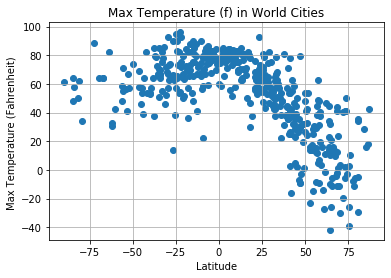

In [18]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["Max Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Max Temperature (f) in World Cities")
plt.ylabel("Max Temperature (Fahrenheit) ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

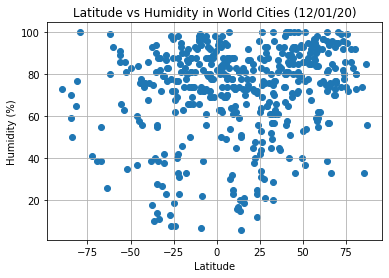

In [19]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity in World Cities (12/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeHumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

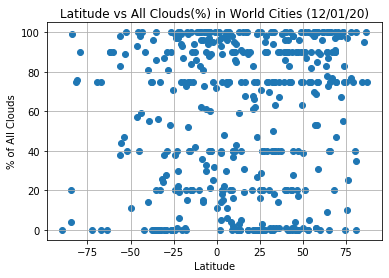

In [20]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs All Clouds(%) in World Cities (12/01/20)")
plt.xlabel("Latitude")
plt.ylabel("% of All Clouds")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeCloudsInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

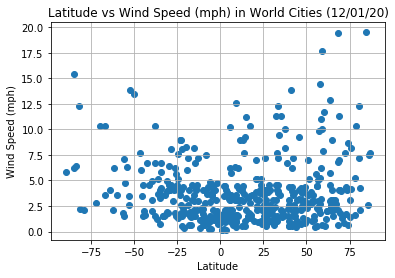

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed (mph) in World Cities (12/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeWindSpeedInWorldCities.png")

# Show plot
plt.show()